
## Q1: Draw a line in a diagram from position (1,2) to position (10,20)
 - 1 set the plot title >> "points plot" , xlabel: "x-axis" , ylabel : "y-axis"
 - 2 using marker type  "star" to represent the points and marker color :red|
 - 3 save the plot figure as fisrtplot.png 


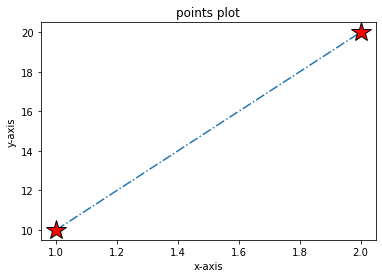

In [111]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2])
y=np.array([10,20])
plt.title("points plot")
plt.xlabel("x-axis" )
plt.ylabel("y-axis" )
plt.plot(x,y,"-.*",mfc = 'r',ms = 20,mec = 'k')
plt.savefig("fisrtplot.png")
plt.show()

##  Q2:   get the local min of the function below using scipy. then plot the equation with the local min point using matlibplot
![image.png](attachment:image.png)

The min of this function is :  [1.75] at x=  [-0.50000002]


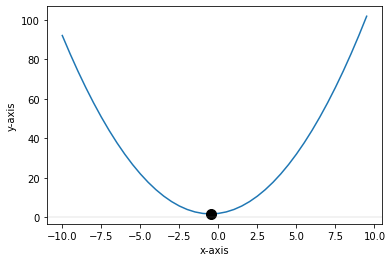

In [112]:
from scipy.optimize import minimize
def f(x):
  return (x**2)+(x)+2
x=np.arange(-10,10,.5)
optim_min=minimize(f,2)
plt.plot(x,f(x))
plt.plot(optim_min.x,f(optim_min.x),"ok",ms=10)
plt.axhline(0,lw=0.2,color="gray")
plt.xlabel("x-axis" )
plt.ylabel("y-axis" )
print("The min of this function is : ",f(optim_min.x),"at x= ",optim_min.x)


## Q3 compute the solution of the system of equations using scipy

![image.png](attachment:image.png)


In [113]:
## we will solve for AX=b
from scipy import linalg
A=np.array([[2,1],[1,1]])
b=np.array([1,1])
X = linalg.solve(A, b)
print(X)
##check 
print(A@X==b)
A@X

[0. 1.]
[ True  True]


array([1., 1.])

## Q4 use the best interpolation method to get Y_new  for this data 

        x = np.arange(0,360,5)
        y = np.sin(np.deg2rad(x))**2-np.cos(np.deg2rad(x))**2
        
   &    
        x_new = np.arange(0,360,10)



/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


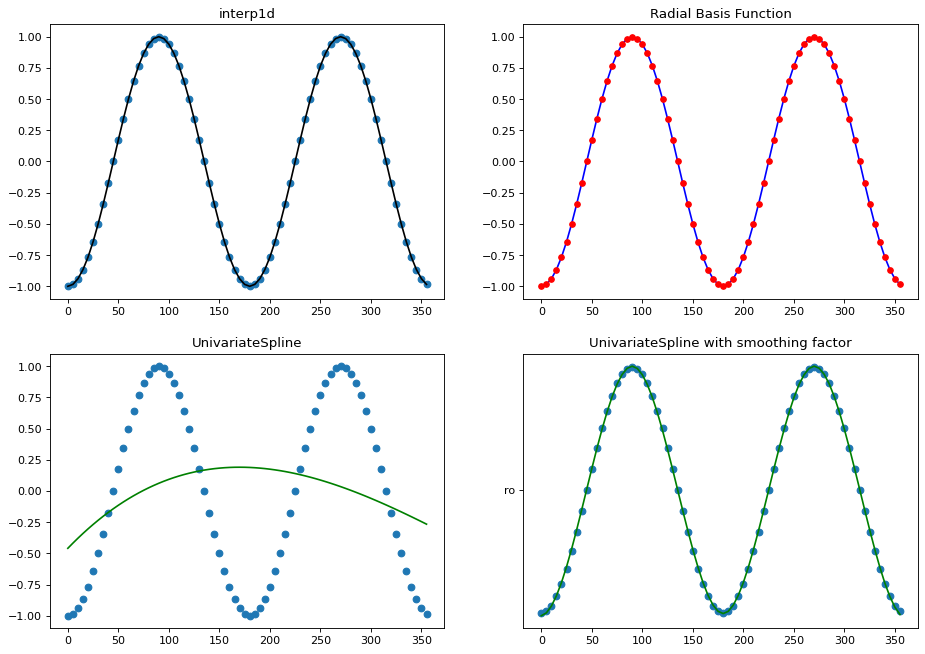

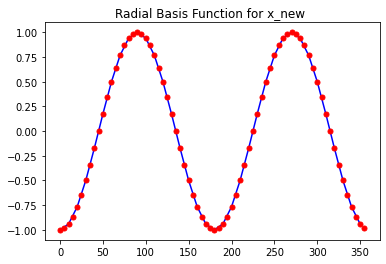

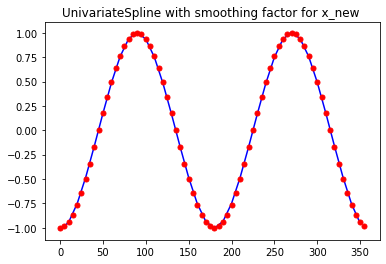

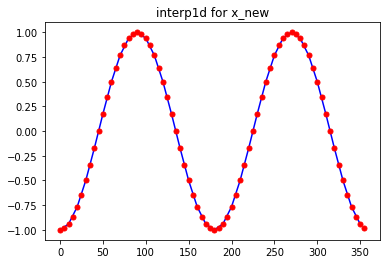

In [114]:

x = np.arange(0,360,5)
y = np.sin(np.deg2rad(x))**2-np.cos(np.deg2rad(x))**2
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
plt.figure(figsize=(14, 10), dpi=80)
plt.subplot(2, 2, 1)
plt.scatter(x,y)
inter_1d=interp1d(x,y)
plt.plot(x,inter_1d(x),'k')
plt.title("interp1d")
plt.subplot(2, 2, 3)
plt.scatter(x,y)
spl = UnivariateSpline(x, y)
plt.plot(x, spl(x), 'g',ms=5)
plt.title("UnivariateSpline")
plt.subplot(2, 2, 4)
plt.scatter(x,y)
spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(0.01)
plt.plot(x, spl(x), 'g','ro', ms=5,label="UnivariateSpline")
plt.title("UnivariateSpline with smoothing factor")
plt.subplot(2, 2, 2)
radial_fun=Rbf(x,y)
radial_fun_plot=radial_fun(x)
plt.plot(x, radial_fun_plot, 'b', x, y, 'ro', ms=5)
plt.title("Radial Basis Function")
plt.show()
###i see that the best interpolation is Radial Basis Function as the data is uniform and this model trying to 
###find the best polynomial function which across all over the points as possible 
x_new = np.arange(0,360,10)
plt.plot(x_new, radial_fun(x_new), 'b', x, y, 'ro', ms=5)
plt.title("Radial Basis Function for x_new ")
plt.show()
plt.plot(x_new,spl(x_new), 'b', x, y, 'ro', ms=5)
plt.title("UnivariateSpline with smoothing factor for x_new ")
plt.show()
plt.plot(x_new, inter_1d(x_new), 'b', x, y, 'ro', ms=5)
plt.title("interp1d for x_new")
plt.show()
###again as we expect that Rbf is the best fit with the new data
